# LOANS: TO GIVE OR NOT TO GIVE?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

loan = pd.read_csv('lending-club-loan-data/loan.csv')


#To plot figs on jupyter
%matplotlib inline
# figure size in inches
rcParams['figure.figsize'] = 16,6


/Users/generalassembly/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (19,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 74 columns):
id                             887379 non-null int64
member_id                      887379 non-null int64
loan_amnt                      887379 non-null float64
funded_amnt                    887379 non-null float64
funded_amnt_inv                887379 non-null float64
term                           887379 non-null object
int_rate                       887379 non-null float64
installment                    887379 non-null float64
grade                          887379 non-null object
sub_grade                      887379 non-null object
emp_title                      835917 non-null object
emp_length                     842554 non-null object
home_ownership                 887379 non-null object
annual_inc                     887375 non-null float64
verification_status            887379 non-null object
issue_d                        887379 non-null object
loan_status          

In [4]:
loan.shape

(887379, 74)

In [5]:
loan.isnull().sum()


id                                  0
member_id                           0
loan_amnt                           0
funded_amnt                         0
funded_amnt_inv                     0
term                                0
int_rate                            0
installment                         0
grade                               0
sub_grade                           0
emp_title                       51462
emp_length                      44825
home_ownership                      0
annual_inc                          4
verification_status                 0
issue_d                             0
loan_status                         0
pymnt_plan                          0
url                                 0
desc                           761351
purpose                             0
title                             152
zip_code                            0
addr_state                          0
dti                                 0
delinq_2yrs                        29
earliest_cr_

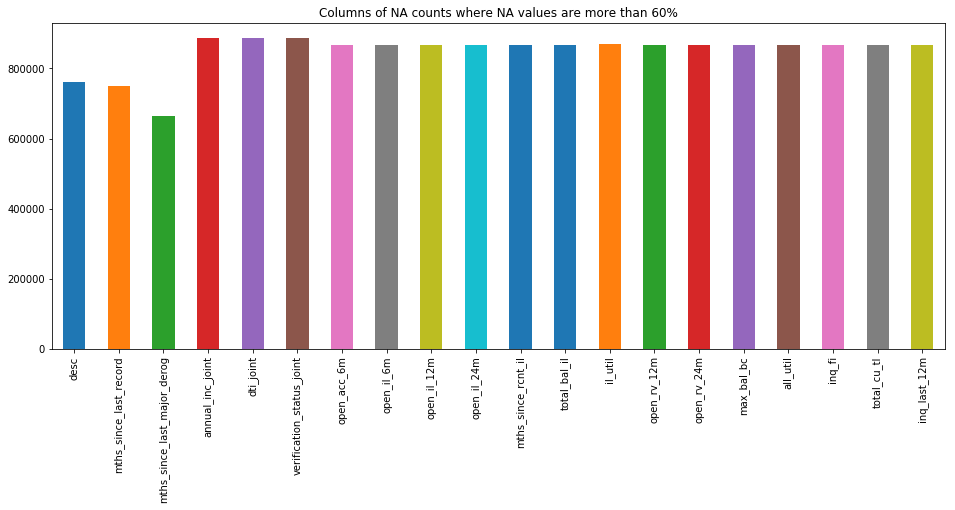

In [6]:
nan_col = loan.isnull().sum()
nan_col = nan_col[nan_col.values >(0.6*len(loan))]
plt.figure(figsize=(16,6))
nan_col.plot(kind='bar')
plt.title('Columns of NA counts where NA values are more than 60%')
plt.show()

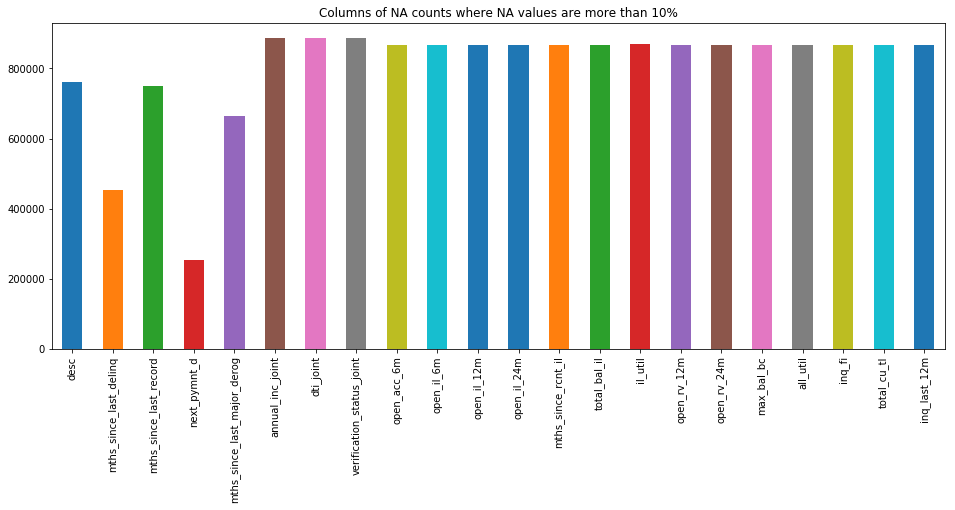

In [7]:
nan_col = loan.isnull().sum()
nan_col = nan_col[nan_col.values >(0.1*len(loan))]
plt.figure(figsize=(16,6))
nan_col.plot(kind='bar')
plt.title('Columns of NA counts where NA values are more than 10%')
plt.show()

In [8]:
loan.loan_status.value_counts()

Current                                                601779
Fully Paid                                             207723
Charged Off                                             45248
Late (31-120 days)                                      11591
Issued                                                   8460
In Grace Period                                          6253
Late (16-30 days)                                        2357
Does not meet the credit policy. Status:Fully Paid       1988
Default                                                  1219
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

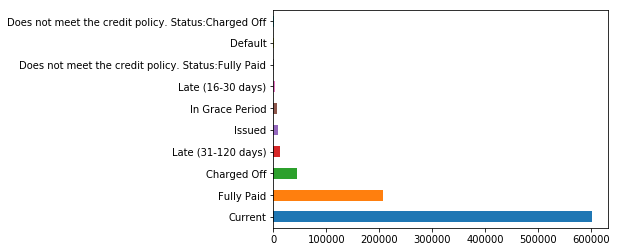

In [9]:
loan.loan_status.value_counts().plot(kind='barh')

In [64]:
loan.int_rate.describe()

count    887379.000000
mean         13.246740
std           4.381867
min           5.320000
25%           9.990000
50%          12.990000
75%          16.200000
max          28.990000
Name: int_rate, dtype: float64

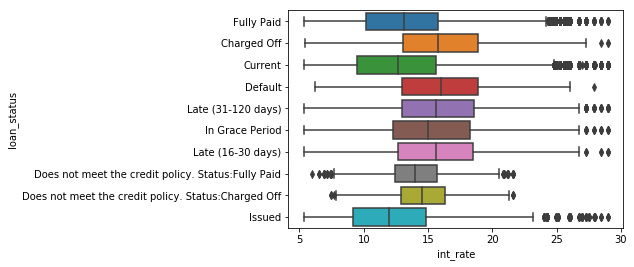

In [72]:
ax = sns.boxplot(x="int_rate", y="loan_status", data=loan)


In [35]:
loan.loan_amnt.describe()

count    887379.000000
mean      14755.264605
std        8435.455601
min         500.000000
25%        8000.000000
50%       13000.000000
75%       20000.000000
max       35000.000000
Name: loan_amnt, dtype: float64

In [10]:
loan.purpose.value_counts()

debt_consolidation    524215
credit_card           206182
home_improvement       51829
other                  42894
major_purchase         17277
small_business         10377
car                     8863
medical                 8540
moving                  5414
vacation                4736
house                   3707
wedding                 2347
renewable_energy         575
educational              423
Name: purpose, dtype: int64

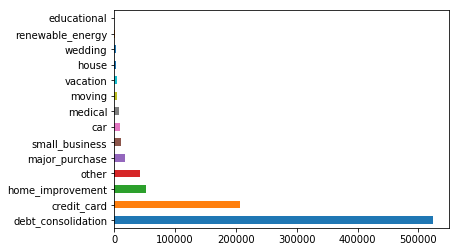

In [11]:
loan.purpose.value_counts().plot(kind='barh')

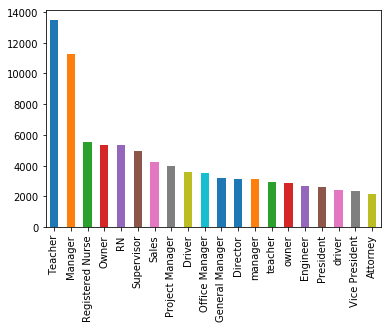

In [60]:
loan.emp_title.value_counts()[:20].plot(kind = 'bar')

In [32]:
loan_correlation=loan.corr()
loan_correlation

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
id,1.000000,0.999443,0.063803,0.066058,0.071502,-0.142963,0.025347,0.033990,0.067781,0.049648,...,0.009510,0.009703,0.011797,0.004960,-0.000543,0.000428,0.048724,-0.013579,-0.000914,0.014084
member_id,0.999443,1.000000,0.064461,0.066754,0.072308,-0.142205,0.026036,0.034146,0.067824,0.049904,...,0.005955,0.009033,0.006729,0.003529,-0.003295,0.000492,0.048660,-0.013022,-0.005038,0.012763
loan_amnt,0.063803,0.064461,1.000000,0.999263,0.997115,0.145023,0.944977,0.332698,0.020675,-0.000159,...,0.135564,-0.107249,-0.051313,-0.028005,0.412165,0.019173,0.312439,0.009638,0.071500,0.007928
funded_amnt,0.066058,0.066754,0.999263,1.000000,0.998025,0.145160,0.946005,0.332466,0.021075,0.000151,...,0.135564,-0.107249,-0.051313,-0.028005,0.412165,0.019173,0.312439,0.009638,0.071500,0.007928
funded_amnt_inv,0.071502,0.072308,0.997115,0.998025,1.000000,0.145205,0.943632,0.331420,0.022185,0.000648,...,0.135529,-0.107337,-0.051439,-0.028118,0.412268,0.018969,0.312473,0.009548,0.071515,0.007820
int_rate,-0.142963,-0.142205,0.145023,0.145160,0.145205,1.000000,0.133075,-0.072786,0.079903,0.055178,...,0.053045,0.183565,0.176683,0.171105,-0.104402,0.288049,-0.166119,0.171162,0.020711,0.252637
installment,0.025347,0.026036,0.944977,0.946005,0.943632,0.133075,1.000000,0.326182,0.014333,0.007876,...,0.116193,-0.102522,-0.022923,-0.004324,0.385694,0.025131,0.286829,0.015213,0.056176,0.029699
annual_inc,0.033990,0.034146,0.332698,0.332466,0.331420,-0.072786,0.326182,1.000000,-0.087410,0.047470,...,0.215808,-0.050157,-0.006532,-0.011844,0.323838,0.009813,0.268860,0.063758,0.052432,0.079720
dti,0.067781,0.067824,0.020675,0.021075,0.022185,0.079903,0.014333,-0.087410,1.000000,-0.002831,...,0.028134,-0.004285,-0.003016,-0.001053,0.010856,0.034614,0.032941,0.011065,0.011851,0.003552
delinq_2yrs,0.049648,0.049904,-0.000159,0.000151,0.000648,0.055178,0.007876,0.047470,-0.002831,1.000000,...,0.061545,-0.012308,-0.025960,-0.054318,-0.063617,0.003157,-0.041070,0.040830,0.014746,0.034490


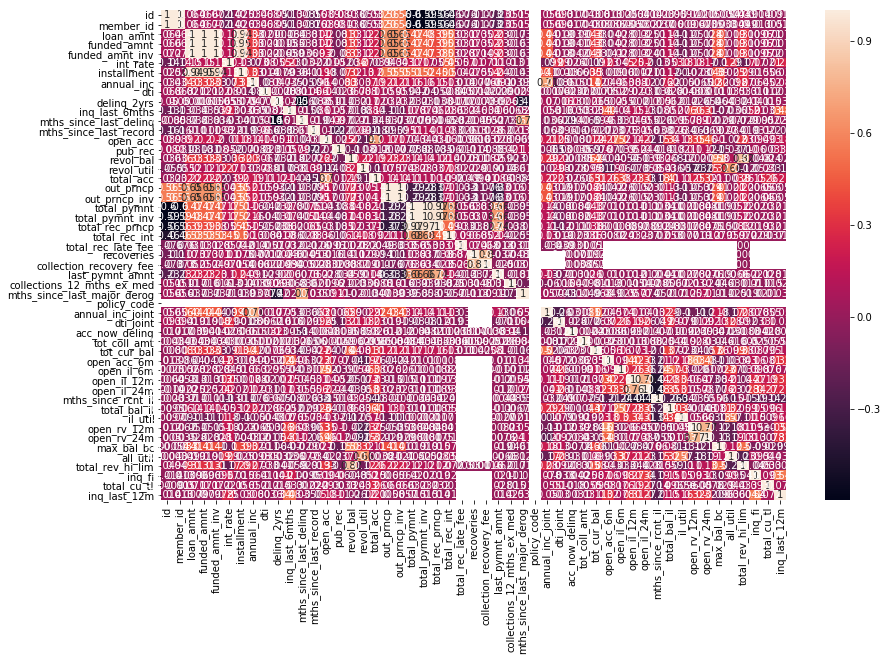

In [33]:
f, ax = plt.subplots(figsize=(14, 9))
sns.heatmap(loan_correlation, 
            xticklabels=loan_correlation.columns.values,
            yticklabels=loan_correlation.columns.values,annot= True)
plt.show()

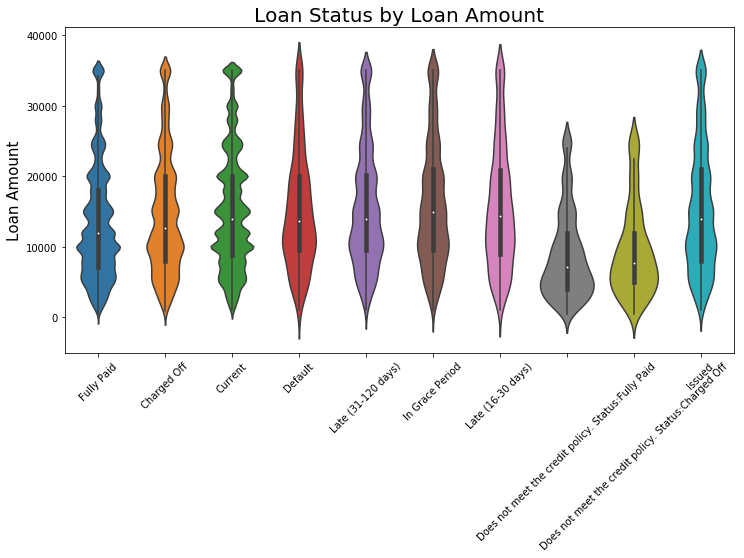

In [37]:
plt.figure(figsize = (12,6))

l_stats_amnt = sns.violinplot(x='loan_status', y="loan_amnt",
                   data=loan)
l_stats_amnt.set_xticklabels(l_stats_amnt.get_xticklabels(),rotation=45)
l_stats_amnt.set_xlabel("", fontsize=12)
l_stats_amnt.set_ylabel("Loan Amount", fontsize=15)
l_stats_amnt.set_title("Loan Status by Loan Amount", fontsize=20)

plt.show()

In [43]:
loan.addr_state.describe()

count     887379
unique        51
top           CA
freq      129517
Name: addr_state, dtype: object

In [38]:
address_loan = ['addr_state', 'loan_status']
cm = sns.light_palette("red", as_cmap=True)
pd.crosstab(loan[address_loan[0]], loan[address_loan[1]]).style.background_gradient(cmap = cm)

loan_status,Charged Off,Current,Default,Does not meet the credit policy. Status:Charged Off,Does not meet the credit policy. Status:Fully Paid,Fully Paid,In Grace Period,Issued,Late (16-30 days),Late (31-120 days)
addr_state,,,,,,,,,,
AK,96,1469,2,1,4,567,15,14,6,31
AL,662,7576,9,8,24,2485,111,122,43,160
AR,337,4637,8,6,9,1417,57,70,13,86
AZ,1049,13577,39,18,33,5028,143,193,50,282
CA,7332,81851,211,101,223,35778,906,1147,327,1641
CO,784,12573,25,13,52,4829,106,166,57,202
CT,614,9353,8,12,50,3067,126,139,29,133
DC,87,1543,2,2,8,750,10,13,0,17
DE,121,1730,5,4,18,546,21,28,7,31
